# 1 - DATA PREPROCESSING

### Import Libraries

In [1]:
#importing libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn; seaborn.set()



### Import Dataset

In [2]:
#Import a dataset
dataset = pd.read_csv('Part 1 - Data Preprocessing/Data.csv') #name of the dataset
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, 3].values #modify extrems if necessary

In [5]:
print(X)

[['France' 44.0 72000.0]
 ['Spain' 27.0 48000.0]
 ['Germany' 30.0 54000.0]
 ['Spain' 38.0 61000.0]
 ['Germany' 40.0 nan]
 ['France' 35.0 58000.0]
 ['Spain' nan 52000.0]
 ['France' 48.0 79000.0]
 ['Germany' 50.0 83000.0]
 ['France' 37.0 67000.0]]


In [6]:
print(y)

['No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']


### Taking Care of Missing Data

In [7]:
#rimpiazziamo i valori mancanti con la media di quello che abbiamo nel data set

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer.fit(X[:, 1:3])
X[:, 1:3] = imputer.transform(X[:, 1:3])

### Encoding Categorical Data

In [8]:
# trasformiamo gli elementi char in elementi numerici nel nostro dataset
# lo faccio come vettori per evitare problemi di eventuale ordinamento che vengono considerati rilevanti 

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0])], remainder = 'passthrough') #column transformer
X = np.array(ct.fit_transform(X))

print(X) #le nazionalità sono riportate come una sorta di variabili booleane ora è come se avessi la colonna Ger quella Fra etc..

[[1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [0.0 1.0 0.0 30.0 54000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 35.0 58000.0]
 [0.0 0.0 1.0 38.77777777777778 52000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 37.0 67000.0]]


### Encoding Dependent Variable

In [9]:
from sklearn.preprocessing import LabelEncoder
#procedura analoga a quella sopra con un Booleano creato in luogo di due 
le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[0 1 0 0 1 1 0 1 0 1]


### Split into Train and Test set

In [10]:
#splitting into training and test datasets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =1)
#possibly different test_size

print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[0.0 0.0 1.0 38.77777777777778 52000.0]
 [0.0 1.0 0.0 40.0 63777.77777777778]
 [1.0 0.0 0.0 44.0 72000.0]
 [0.0 0.0 1.0 38.0 61000.0]
 [0.0 0.0 1.0 27.0 48000.0]
 [1.0 0.0 0.0 48.0 79000.0]
 [0.0 1.0 0.0 50.0 83000.0]
 [1.0 0.0 0.0 35.0 58000.0]]
[0 1 0 0 1 1 0 1]
[[0.0 1.0 0.0 30.0 54000.0]
 [1.0 0.0 0.0 37.0 67000.0]]
[0 1]


### Feature Scaling
Avoid feature to be dominating for some ML models. Methods most frequent are standardisation
$$   \frac{x - \langle x \rangle}{\sigma}$$

and normalisation
$$\frac{x - \min}{\max -\min} $$

normalisation $\rightarrow$ data follow a normal distribution

standardisation $\rightarrow$ works in most cases

In [11]:
#feature scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train[:, 3:] = sc.fit_transform(X_train[:, 3:]) #non si applica alle dummy variable
X_test[:, 3:] = sc.transform(X_test[:, 3:])

print(X_train)
print(y_train)
print(X_test)
print(y_test)

[[0.0 0.0 1.0 -0.19159184384578545 -1.0781259408412425]
 [0.0 1.0 0.0 -0.014117293757057777 -0.07013167641635372]
 [1.0 0.0 0.0 0.566708506533324 0.633562432710455]
 [0.0 0.0 1.0 -0.30453019390224867 -0.30786617274297867]
 [0.0 0.0 1.0 -1.9018011447007988 -1.420463615551582]
 [1.0 0.0 0.0 1.1475343068237058 1.232653363453549]
 [0.0 1.0 0.0 1.4379472069688968 1.5749910381638885]
 [1.0 0.0 0.0 -0.7401495441200351 -0.5646194287757332]]
[0 1 0 0 1 1 0 1]
[[0.0 1.0 0.0 -1.4661817944830124 -0.9069571034860727]
 [1.0 0.0 0.0 -0.44973664397484414 0.2056403393225306]]
[0 1]


# 2- Regression Methods
## 2-1 Linear Regression

In [12]:
dataset = pd.read_csv('Part 2 - Regression/Section 4 - Simple Linear Regression/Salary_Data.csv') #name of the dataset
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values #modify extrems if necessary


from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =42)
#possibly different test_size


In [13]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression().fit(X_train,y_train)
result = LR.predict(X_test)

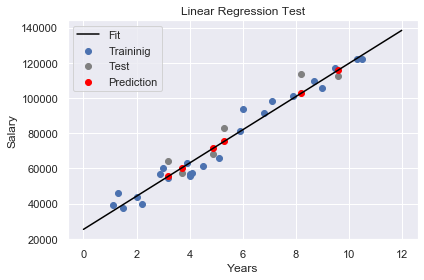

In [14]:

x = np.linspace(0,12,2000)
plt.scatter(X_train, y_train, c='b')
plt.scatter(X_test, y_test, c='grey')
plt.scatter(X_test, result, c='red')
plt.plot(x, LR.coef_ * x + LR.intercept_, c='black')
plt.legend(['Fit','Traininig','Test','Prediction'])
plt.xlabel('Years')
plt.ylabel('Salary')
plt.title('Linear Regression Test')
plt.tight_layout()
plt.savefig('Part 2 - Regression/Section 4 - Simple Linear Regression/SLR.jpg', dpi=199)

### 2-2 Multiple Linear Regression

Supoe we want to study whether multiple variables influence a determined numerical output. Lets call the input $x_i$ for $i \in (1 \dots n)$ and the output $y$. We want to study the relation
$$
    y = a_0 + \sum_i a_i x_i
$$

This can be done in a MLR framework. In this case we have a file with many independent variables, referred to different features of companies and we want to understand how that relates to the profit.

Assumption for MLR

1- Linearity

2- Homoscedastiscity

3- Multivariate Normality

4- Indep. of errors

5- Lack of multicollinearity

NEVER add a variable for each dummy variable! $\rightarrow$ DV trap

#### P-Value
Statistical Significance $\rightarrow$ test of the null hp

$p < 0.05 \; \rightarrow $ reject the null hp

#### Backward elimination

It is a useful criterion for multivariate models since allows one to eventually eliminate non relevant features. By eliminating those one gets the best relevant features for the model. Note $\rightarrow$ we keep the variables with the smallest p-value since a small p relates a big chance to observe correlation.


In [15]:
dataset = pd.read_csv('Part 2 - Regression/Section 5 - Multiple Linear Regression/50_Startups.csv') #name of the dataset
X = dataset.iloc[:, :-1].values 
y = dataset.iloc[:, -1].values #modify extrems if necessary

ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [-1])], remainder = 'passthrough') #column transformer
X = np.array(ct.fit_transform(X))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)
#possibly different test_size


In [16]:
from sklearn.linear_model import LinearRegression #avoids by itself the dummy variable trap and takes care of bw elimination

MLR = LinearRegression().fit(X_train, y_train)
results = MLR.predict(X_test)

confrontation = np.concatenate((y_test.reshape(len(y_test),1), results.reshape(len(results),1)), axis=1)
print(confrontation)

[[103282.38       103015.20159796]
 [144259.4        132582.27760816]
 [146121.95       132447.73845174]
 [ 77798.83        71976.09851258]
 [191050.39       178537.48221055]
 [105008.31       116161.24230166]
 [ 81229.06        67851.69209676]
 [ 97483.56        98791.73374686]
 [110352.25       113969.43533013]
 [166187.94       167921.06569551]]


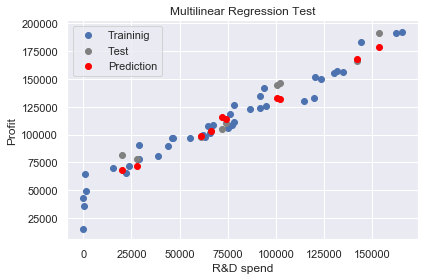

In [17]:
x = np.linspace(0,150000,2000)
plt.scatter(X_train[:,3], y_train, c='b')
plt.scatter(X_test[:,3], y_test, c='grey')
plt.scatter(X_test[:,3], results, c='red')
plt.legend(['Traininig','Test','Prediction'])
plt.xlabel('R&D spend')
plt.ylabel('Profit')
plt.title('Multilinear Regression Test')
plt.tight_layout()
plt.savefig('Part 2 - Regression/Section 5 - Multiple Linear Regression/MLR.jpg', dpi=199)

## 2-3 Polynomial Regression

It is similar to MLR but there is only one independent variable

$$ y= a_0 + \sum_{n=1}^{k} a_n x_n^n $$

to a degree $k$ as high as we need to $\rightarrow$ pay attention to the degree, the regressor might be more precise with the data you already have but at the same time less flexible in handling new data

In [56]:
dataset = pd.read_csv('Part 2 - Regression/Section 6 - Polynomial Regression/Position_Salaries.csv') #name of the dataset
X = dataset.iloc[:, 1:-1].values #elimino label
y = dataset.iloc[:, -1].values #modify extrems if necessary

In [57]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
SLR = LinearRegression().fit(X,y) #polynomial degree 1
Poly = PolynomialFeatures(degree=4)
PLR =Poly.fit_transform(X) #polynomial degree 4
PLR = LinearRegression().fit(PLR,y)


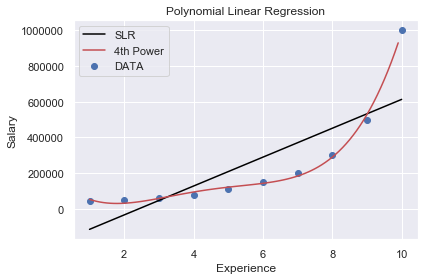

In [58]:
x = np.arange(1,10,0.1)
x = x.reshape((len(x),1))
plt.scatter(X, y, c='b')
plt.plot(X, SLR.predict(X), c ='black')
plt.plot(x, PLR.predict(Poly.fit_transform(x)), c='r')
plt.legend(['SLR','4th Power','DATA'])
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Polynomial Linear Regression')
plt.tight_layout()
plt.savefig('Part 2 - Regression/Section 6 - Polynomial Regression/PLR.jpg', dpi=199)

In [21]:
print('Linear prediction:', SLR.predict([[6.5]]))
print('Poly Prediction:', PLR.predict(Poly.fit_transform([[6.5]])))

Linear prediction: [330378.78787879]
Poly Prediction: [158862.45265153]


## 2-4 SVR
Support Vettor Regression $\rightarrow$ The idea is that instead of a line (Linear regression) we build a tube around the data points. The tube is the $\epsilon$-insensitive tube. In this tube there is no difference between the points in terms of the error. The points outside the tube are relevant and we measure the difference between those points and the tube. We find the curve such that for error $\epsilon$:
$$
\frac{1}{2} ||w||^2 +c \sum_{i=1}^m (\epsilon_i + \epsilon_i ^*) \rightarrow \min
$$
which minimises the distance between the points outside the tube and the tube.

It is called a SVR because the points outside the tube are individuated by vectors and are the support vectors of the regression.

SVR can be non linear as well. 

In [91]:
dataset = pd.read_csv('Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/Position_Salaries.csv') #name of the dataset
X = dataset.iloc[:, 1:-1].values #elimino label
y = dataset.iloc[:, -1].values #modify extrems if necessary

#apply feature scaling (equation does not have coefficient balancing)
sc_1 = StandardScaler()
sc_2 = StandardScaler()

X = sc_1.fit_transform(X) #non si applica alle dummy variable
y = sc_2.fit_transform(y.reshape(len(y),1))

In [92]:
from sklearn.svm import SVR
Reg = SVR(kernel='rbf', degree=3)
Reg.fit(X,y.ravel())

print( sc_2.inverse_transform ( Reg.predict ( sc_1.transform( [[6.5]] ) ) ) )


[170370.0204065]


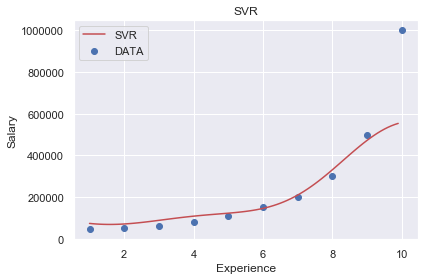

In [54]:
x = np.arange(min(sc_1.inverse_transform(X)),max(sc_1.inverse_transform(X)),0.1)
x = x.reshape((len(x),1))

plt.scatter(sc_1.inverse_transform(X), sc_2.inverse_transform(y), c='b')
plt.plot(x, sc_2.inverse_transform(Reg.predict( sc_1.transform(x) ) ), c='r')
plt.legend(['SVR','DATA'])
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('SVR')
plt.tight_layout()
plt.savefig('Part 2 - Regression/Section 7 - Support Vector Regression (SVR)/SVR.jpg', dpi=199)

## 2-5 Decision Trees for Regression

Given a scatter plot with $x_1, x_2$ as independent variable we want to determine an independent variable $y$. A regression tree algorithms splits the scatter in section according to the values of the $x_1$ or $x_2$ variable, according to the information entropy. The split tend to increase the amunt of information we obtain from the dataset. 

According to the values of the split we create a decision tree.

Example: 

1) is $x_1 > 40$ yes/no?

2) if $x_1 > 40$ is $x_2 < 30$ yes/no?

...

we create then a partition of the original dataset (leaves of a tree). For each of those partition we assign at $y$ the average of the $y$ of the elements in that subset. Every new element falling into that leaf (the subset) will get this exact value.

In [59]:
dataset = pd.read_csv('Part 2 - Regression/Section 8 - Decision Tree Regression/Position_Salaries.csv') #name of the dataset
X = dataset.iloc[:, 1:-1].values #elimino label
y = dataset.iloc[:, -1].values #modify extrems if necessary


In [72]:
from sklearn.tree import DecisionTreeRegressor
Dec_tree = DecisionTreeRegressor(random_state=0).fit(X,y) #fit su training set
Dec_tree.predict([[6.5]]) #prediction of new value

array([150000.])

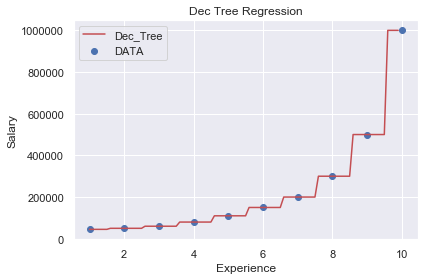

In [74]:
x = np.arange(1,10,0.1)
x = x.reshape((len(x),1))

plt.scatter(X, y, c='b')
plt.plot(x, Dec_tree.predict(x), c ='r')
plt.legend(['Dec_Tree','DATA'])
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Dec Tree Regression')
plt.tight_layout()
plt.savefig('Part 2 - Regression/Section 8 - Decision Tree Regression/DEC_TREE_REG.jpg', dpi=199)

## 2-6 Random Forest Regression

Case of Ensemble Learning $\rightarrow$ take multiple algorithms and join them together to have a more poowerful effect. 

Take a set of $K$ random data points from my data set

Build a decision tree based on those data points

Repeat for many cases

Final prediction is given by the average of all values

In [75]:
dataset = pd.read_csv('Part 2 - Regression/Section 9 - Random Forest Regression/Position_Salaries.csv') #name of the dataset
X = dataset.iloc[:, 1:-1].values #elimino label
y = dataset.iloc[:, -1].values #modify extrems if necessary

In [82]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=10, random_state=0).fit(X,y)
regressor.predict([[6.5]])

array([167000.])

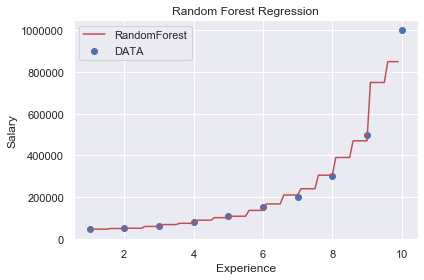

In [83]:
x = np.arange(1,10,0.1)
x = x.reshape((len(x),1))

plt.scatter(X, y, c='b')
plt.plot(x, regressor.predict(x), c ='r')
plt.legend(['RandomForest','DATA'])
plt.xlabel('Experience')
plt.ylabel('Salary')
plt.title('Random Forest Regression')
plt.tight_layout()
plt.savefig('Part 2 - Regression/Section 9 - Random Forest Regression/RF_Reg.jpg', dpi=199)

## 2-7 R squared

Parameter that helps to evaluate whether the model applied to display the data is correct (actually a good model rather than correct). 

R squared is defined as follows

$
R^2 = 1 - \frac{\sigma_{res}}{\sigma_{tot}}$   
$\sigma_{res}= \sum_i (y_i - y^{'}_i)^2 $   
$ \sigma_{tot}= \sum_i (y_i - \langle y \rangle)^2 
$

where $\langle y \rangle$ indicates the average, whereas $y^{'}_i$ indicates the $i$-th predicted value with the model.

$\sigma_{res} \rightarrow 0$ (which is the goal of regressions) $R^2 \rightarrow 1$

### Adjusted R squared

As one adds more variables to the model, $R^2$ needs to be adjusted. $R^2$ cannot decrease when we add more variables, since $\sigma_{res}$ is monotonically decreasing. Since $\sigma_{tot}$ is a parameter of the data set $R^2$ can only increase or stay the same. It is possible though to adjust $R^2$
$$
R^2_{adj} = 1 - (1 - R^2) \frac{n-1}{n-p-1}
$$
where $p$ is the number of regressors (indep. variables) and $n$ is the sample size. $R^2_{adj}$ penalises us if we add more irrelevant features. In fact if we add a feature then $R^2$ becomes bigger as seen above, whereas $p$ also increases by one. Hence if the new feature is irrelevant $R^2$increases by a little, whereas $p$ does so by 1. As a consequence $(1 - R^2)$ stays almost the same and $\frac{n-1}{n-p-1}$ increases $\rightarrow$ $R^2_{adj}$ decreases.

In [126]:
dataset = pd.read_csv('Part 2 - Regression/Section 10 - Evaluating Regression Models Performance/Data.csv') #name of the dataset
sc = StandardScaler()
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]
X_svr = sc.fit_transform(X) #non si applica alle dummy variable
y_svr = sc.fit_transform(np.array(y).reshape(len(y),1))

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state =0)
X_train_svr, X_test_svr, y_train_svr, y_test_svr = train_test_split(X_svr, y_svr, test_size = 0.2, random_state =0)


In [133]:

R_sq = np.array([])
#multiple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
lin_reg = LinearRegression().fit(X_train, y_train) 
R_sq = np.append(R_sq, r2_score(lin_reg.predict(X_test), y_test))

#polynomial
from sklearn.preprocessing import PolynomialFeatures
Poly = PolynomialFeatures(degree=4)
PLR =Poly.fit_transform(X_train) #polynomial degree 4
PLR = LinearRegression().fit(PLR,y_train)
R_sq = np.append(R_sq, r2_score(PLR.predict(Poly.transform(X_test)), y_test))

#SVR
from sklearn.svm import SVR
svr_reg = SVR(kernel='rbf', degree=3, gamma='scale').fit(X_train_svr, y_train_svr.ravel())
R_sq = np.append(R_sq, r2_score(sc.inverse_transform(svr_reg.predict(X_test_svr)), sc.inverse_transform(y_test_svr)))


#Decision Tree Regression
from sklearn.tree import DecisionTreeRegressor
DT_reg = DecisionTreeRegressor().fit(X_train,y_train)
R_sq = np.append(R_sq, r2_score(DT_reg.predict(X_test), y_test))

#Random Forest
from sklearn.ensemble import RandomForestRegressor
RF_reg = RandomForestRegressor(n_estimators=10, random_state=0).fit(X_train, y_train)
R_sq = np.append(R_sq, r2_score(RF_reg.predict(X_test), y_test))

print(R_sq)


[0.92779056 0.94251302 0.94622149 0.9175121  0.95996547]


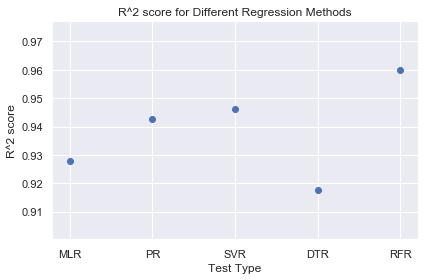

In [135]:
plt.scatter(['MLR', 'PR','SVR','DTR','RFR'],R_sq, c='b')
plt.xlabel('Test Type')
plt.ylabel('R^2 score')
plt.title('R^2 score for Different Regression Methods')
plt.tight_layout()
plt.savefig('Part 2 - Regression/Section 9 - Random Forest Regression/RF_Reg.jpg', dpi=199)

In [1]:
%clear